In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
%config IPCompleter.greedy=True

In [96]:
dataset = pd.read_csv("../data/Position_Salaries.csv")
print(dataset)

             Position  Level   Salary
0    Business Analyst    1.0    45000
1   Junior Consultant    2.0    50000
2   Junior Consultant    2.5    10000
3   Senior Consultant    3.0    60000
4             Manager    4.0    80000
5     Country Manager    5.0   110000
6      Region Manager    6.0   150000
7             Partner    7.0   200000
8      Senior Partner    8.0   300000
9             C-level    9.0   500000
10                CEO   10.0  1000000


In [97]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1, 1)
print(X)

[[ 1. ]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 4. ]
 [ 5. ]
 [ 6. ]
 [ 7. ]
 [ 8. ]
 [ 9. ]
 [10. ]]


In [98]:
y = dataset.iloc[:, 2].values
print(y)

[  45000   50000   10000   60000   80000  110000  150000  200000  300000
  500000 1000000]


In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [100]:
regressor.estimators_[4].predict([[6.5]])


array([150000.])

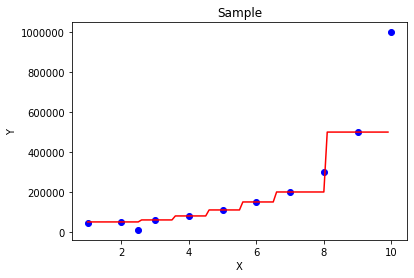

In [101]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(X, y, color = "blue")
plt.plot(X_grid, regressor.estimators_[4].predict(X_grid), color="red")
plt.title("Sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [102]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor.estimators_[5], out_file ='./output/tree.dot')  